## 1. The Dataset for Classification Problem

In [1]:
# import all the important basic packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from joblib import Parallel

In [2]:
# import data

rice_df = pd.read_excel('./Rice_Cammeo_Osmancik.xlsx', engine='openpyxl')

Die Beschreibung des Datensatzes lautet wie folgt:

In [3]:
rice_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               3810 non-null   int64  
 1   Perimeter          3810 non-null   float64
 2   Major_Axis_Length  3810 non-null   float64
 3   Minor_Axis_Length  3810 non-null   float64
 4   Eccentricity       3810 non-null   float64
 5   Convex_Area        3810 non-null   int64  
 6   Extent             3810 non-null   float64
 7   Class              3810 non-null   object 
dtypes: float64(5), int64(2), object(1)
memory usage: 238.2+ KB


In [4]:
rice_df.head(3)

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo


## 2. Among different algorithms and hyperparameters to find the "best" model

In [5]:
# orignial Daten preprocessing
# Training Set and Testing Set spliting

X, y = rice_df.drop(columns = 'Class'), rice_df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

### (a) Model 1: Logistic Regression

In [6]:
from sklearn.linear_model import LogisticRegression

LogistReg_clf = LogisticRegression().fit(X_train, y_train)
LogistReg_clf.score(X_test, y_test)

0.937007874015748

#### Adjusting the Hyperparameters with Grid Sreach

In [7]:
gridsearch_LogistReg = GridSearchCV(estimator = LogisticRegression(), param_grid = 
                                    {'C': [1, 5], 'random_state': [1, 5]}).fit(X_train, y_train)

print("Best Estimator is: {}".format(gridsearch_LogistReg.best_estimator_))
print("Best score on train dataset is: {}".format(gridsearch_LogistReg.best_score_))
print("The score on test dataset is: {}".format(gridsearch_LogistReg.score(X_test, y_test)))

Best Estimator is: LogisticRegression(C=1, random_state=1)
Best score on train dataset is: 0.9284729064039409
The score on test dataset is: 0.937007874015748


### (b) Model 2: Ridge Classifier

In [8]:
from sklearn.linear_model import RidgeClassifier

Ridge_clf = RidgeClassifier().fit(X_train, y_train)
Ridge_clf.score(X_test, y_test)

0.9409448818897638

#### Adjusting the Hyperparameters with Grid Sreach

In [9]:
gridsearch_Ridge = GridSearchCV(estimator = RidgeClassifier(), 
                                param_grid = {'alpha': [1, 5], 'random_state': [1, 5]}).fit(X_train, y_train)

print("Best Estimator is: {}".format(gridsearch_LogistReg.best_estimator_))
print("Best score on train dataset is: {}".format(gridsearch_LogistReg.best_score_))
print("The score on test dataset is: {}".format(gridsearch_LogistReg.score(X_test, y_test)))

Best Estimator is: LogisticRegression(C=1, random_state=1)
Best score on train dataset is: 0.9284729064039409
The score on test dataset is: 0.937007874015748


### (c) Model 3: Use gradient descent to improve (rule update)

In [10]:
from sklearn.linear_model import SGDClassifier

SGD_clf = SGDClassifier().fit(X_train, y_train)
SGD_clf.score(X_test, y_test)

0.4868766404199475

#### Adjusting the Hyperparameters with Grid Sreach

In [11]:
gridsearch_SGD = GridSearchCV(estimator = SGDClassifier(), 
                              param_grid = {'alpha': [1, 10], 
                                            'max_iter': [100, 10000], 
                                            'early_stopping': [True], 
                                            'random_state': [1, 10]}).fit(X_train, y_train)

print("Best Estimator is: {}".format(gridsearch_SGD.best_estimator_))
print("Best score on train dataset is: {}".format(gridsearch_SGD.best_score_))
print("The score on test dataset is: {}".format(gridsearch_SGD.score(X_test, y_test)))

Best Estimator is: SGDClassifier(alpha=1, early_stopping=True, max_iter=100, random_state=1)
Best score on train dataset is: 0.4849180327868853
The score on test dataset is: 0.5577427821522309


### (d) Model 4: Support Vector Machines, SVM

Hard SVM

In [12]:
from sklearn import svm

svm_clf = svm.SVC().fit(X_train, y_train)
svm_clf.score(X_test, y_test)

0.884514435695538

Soft SVM

In [13]:
svm_rbf_clf = svm.SVC(kernel = 'rbf', probability = True).fit(X_train, y_train)
svm_rbf_clf.score(X_test, y_test)

0.884514435695538

#### Adjusting the Hyperparameters with Grid Sreach

In [14]:
gridsearch_svm = GridSearchCV(
    estimator = svm.SVC(), param_grid = {'C': [1, 10], 
                                         'kernel': ('linear', 'rbf', 'poly', 'sigmoid'), 
                                         'degree': [1, 5]}).fit(X_train, y_train)

print("Best Estimator is: {}".format(gridsearch_svm.best_estimator_))
print("Best score on train dataset is: {}".format(gridsearch_svm.best_score_))
print("The score on test dataset is: {}".format(gridsearch_svm.score(X_test, y_test)))

Best Estimator is: SVC(C=10, degree=1, kernel='linear')
Best score on train dataset is: 0.9297881504212764
The score on test dataset is: 0.9356955380577427


In [15]:
gridsearch_svm.cv_results_

{'mean_fit_time': array([1.80770555, 0.09990973, 0.07100978, 0.25352836, 1.74630618,
        0.09426556, 0.07385483, 0.25774684, 1.39864469, 0.09673543,
        0.06690059, 0.07512703, 1.32924628, 0.09497361, 0.0968574 ,
        0.07547626]),
 'std_fit_time': array([0.66995452, 0.00123124, 0.00086972, 0.02737231, 0.66034121,
        0.00134501, 0.00175246, 0.03099525, 0.45474105, 0.00206743,
        0.00238682, 0.06449244, 0.37553435, 0.00248249, 0.00597887,
        0.0651999 ]),
 'mean_score_time': array([0.00689025, 0.0609745 , 0.01497426, 0.04482341, 0.00653152,
        0.05458593, 0.01383061, 0.04502611, 0.00712004, 0.05134034,
        0.01362872, 0.01815338, 0.00653977, 0.05223083, 0.01407681,
        0.01830611]),
 'std_score_time': array([0.00039126, 0.00803554, 0.00048002, 0.0003478 , 0.00018064,
        0.00151948, 0.00055785, 0.0003591 , 0.00093219, 0.00133719,
        0.00077876, 0.01386252, 0.00011601, 0.00102545, 0.00028875,
        0.01421121]),
 'param_C': masked_array(d

### (e) Model 5: k-Nearest Neighbor

In [16]:
from sklearn.neighbors import KNeighborsClassifier

neigh_clf = KNeighborsClassifier().fit(X_train, y_train)
neigh_clf.score(X_test, y_test)

0.889763779527559

#### Adjusting the Hyperparameters with Grid Sreach

In [17]:
gridsearch_neigh = GridSearchCV(estimator = KNeighborsClassifier(), 
                                param_grid = {'n_neighbors': [1, 10], 
                                              'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'), 
                                              'leaf_size': [1, 50]}).fit(X_train, y_train)

print("Best Estimator is: {}".format(gridsearch_neigh.best_estimator_))
print("Best score on train dataset is: {}".format(gridsearch_neigh.best_score_))
print("The score on test dataset is: {}".format(gridsearch_neigh.score(X_test, y_test)))

Best Estimator is: KNeighborsClassifier(leaf_size=1, n_neighbors=10)
Best score on train dataset is: 0.880903927427387
The score on test dataset is: 0.889763779527559


### (f) Model 6: Decision Tree

In [18]:
from sklearn import tree

DT_clf = tree.DecisionTreeClassifier().fit(X_train, y_train)
DT_clf.score(X_test, y_test)

0.916010498687664

#### Adjusting the Hyperparameters with Grid Sreach

In [19]:
gridsearch_DT = GridSearchCV(
    estimator = tree.DecisionTreeClassifier(), 
    param_grid = {'criterion': ('gini', 'entropy'), 
                  'splitter': ('best', 'random'), 
                  'max_depth': [1, 50], 
                  'min_samples_leaf': [1, 10]}).fit(X_train, y_train)

print("Best Estimator is: {}".format(gridsearch_DT.best_estimator_))
print("Best score on train dataset is: {}".format(gridsearch_DT.best_score_))
print("The score on test dataset is: {}".format(gridsearch_DT.score(X_test, y_test)))

Best Estimator is: DecisionTreeClassifier(criterion='entropy', max_depth=1)
Best score on train dataset is: 0.9258515707017686
The score on test dataset is: 0.9304461942257218


### (g) Bayesian Classification

#### Model 7 Naive Bayes classifier for Multivariate Bernoulli Models

In [20]:
from sklearn.naive_bayes import BernoulliNB

Bernoulli_clf = BernoulliNB().fit(X_train, y_train)
Bernoulli_clf.score(X_test, y_test)

0.5577427821522309

In [21]:
gridsearch_Bernoulli = GridSearchCV(estimator = BernoulliNB(), 
                                    param_grid = {'alpha': [1, 2], 'fit_prior': [False]}).fit(X_train, y_train)

print("Best Estimator is: {}".format(gridsearch_Bernoulli.best_estimator_))
print("Best score on train dataset is: {}".format(gridsearch_Bernoulli.best_score_))
print("The score on test dataset is: {}".format(gridsearch_Bernoulli.score(X_test, y_test)))

Best Estimator is: BernoulliNB(alpha=1, fit_prior=False)
Best score on train dataset is: 0.5757877735605265
The score on test dataset is: 0.5577427821522309


#### Model 8 Naive Bayes Classifier for Categorical Features

In [22]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.naive_bayes import CategoricalNB

enc = OrdinalEncoder()

x_train = enc.fit(X_train).fit_transform(X_train)
x_test = enc.fit(X_test).fit_transform(X_test)

Categ_clf = CategoricalNB().fit(x_train, y_train)
Categ_clf.score(x_test, y_test)

0.5577427821522309

#### Model 9 Gaussian Naive Bayes Algorithm for Classification

In [23]:
from sklearn.naive_bayes import GaussianNB

Gaussian_clf = GaussianNB().fit(X_train, y_train)
Gaussian_clf.score(X_test, y_test)

0.9186351706036745

In [24]:
gridsearch_Gaussian = GridSearchCV(estimator = GaussianNB(), 
                                   param_grid = {'var_smoothing': [0, 1]}).fit(X_train, y_train)

print("Best Estimator is: {}".format(gridsearch_Gaussian.best_estimator_))
print("Best score on train dataset is: {}".format(gridsearch_Gaussian.best_score_))
print("The score on test dataset is: {}".format(gridsearch_Gaussian.score(X_test, y_test)))

Best Estimator is: GaussianNB(var_smoothing=0)
Best score on train dataset is: 0.9160101214029988
The score on test dataset is: 0.926509186351706


#### Model 10 Naive Bayes Classifier for Multinomial Models

In [25]:
from sklearn.naive_bayes import MultinomialNB

Multi_Gaussian_clf = MultinomialNB().fit(X_train, y_train)
Multi_Gaussian_clf.score(X_test, y_test)

0.8517060367454068

In [26]:
gridsearch_Multi_Gaussian = GridSearchCV(estimator = MultinomialNB(), 
                                         param_grid = {'alpha': [0.001, 2]}).fit(X_train, y_train)

print("Best Estimator is: {}".format(gridsearch_Multi_Gaussian.best_estimator_))
print("Best score on train dataset is: {}".format(gridsearch_Multi_Gaussian.best_score_))
print("The score on test dataset is: {}".format(gridsearch_Multi_Gaussian.score(X_test, y_test)))

Best Estimator is: MultinomialNB(alpha=0.001)
Best score on train dataset is: 0.8539944547632506
The score on test dataset is: 0.8517060367454068


### (h) Model 11: Neural Networks

In [27]:
from sklearn.neural_network import MLPClassifier

MLP_clf = MLPClassifier().fit(X_train, y_train)
MLP_clf.score(X_test, y_test)

0.7913385826771654

In [28]:
import warnings
warnings.filterwarnings("ignore")

gridsearch_MLP = GridSearchCV(
    estimator = MLPClassifier(), 
    param_grid = {'hidden_layer_sizes': [1, 10], 'random_state': [1, 20], 'max_iter': [1000, 10000], 
                  'activation': ('identity', 'logistic', 'relu', 'tanh'), 
                  'alpha': [0.0001, 1], 
                  'learning_rate': ('constant', 'invscaling', 'adaptive')}).fit(X_train, y_train)

print("Best Estimator is: {}".format(gridsearch_MLP.best_estimator_))
print("Best Parameter is: {}".format(gridsearch_MLP.best_params_))
print("Best score on train dataset is: {}".format(gridsearch_MLP.best_score_))
print("The score on test dataset is: {}".format(gridsearch_MLP.score(X_test, y_test)))

Best Estimator is: MLPClassifier(hidden_layer_sizes=10, max_iter=1000, random_state=20)
Best Parameter is: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': 10, 'learning_rate': 'constant', 'max_iter': 1000, 'random_state': 20}
Best score on train dataset is: 0.7693483000888315
The score on test dataset is: 0.7204724409448819


### (i) Ensemble Methods

#### Model 12: Bagging Meta-Estimator

In [29]:
from sklearn.ensemble import BaggingClassifier

Bag_clf = BaggingClassifier(base_estimator = svm.SVC(), n_estimators=10, random_state = 0).fit(X_train, y_train)
Bag_clf.score(X_test, y_test)

0.884514435695538

 #### Model 13: Forests of Randomized Trees

In [30]:
from sklearn.ensemble import RandomForestClassifier

randForest_clf= RandomForestClassifier().fit(X_train, y_train)
randForest_clf.score(X_test, y_test)

0.9238845144356955

In [31]:
gridsearch_randForest = GridSearchCV(estimator = RandomForestClassifier(), 
                                     param_grid = {'max_depth': [1, 10], 
                                                   'n_estimators': [3, 200], 
                                                   'random_state': [0, 10]}, cv = 6).fit(X_train, y_train)

print("Best Estimator is: {}".format(gridsearch_randForest.best_estimator_))
print("Best score on train dataset is: {}".format(gridsearch_randForest.best_score_))
print("The score on test dataset is: {}".format(gridsearch_randForest.score(X_test, y_test)))

Best Estimator is: RandomForestClassifier(max_depth=1, n_estimators=3, random_state=10)
Best score on train dataset is: 0.9261811023622046
The score on test dataset is: 0.926509186351706


#### Model 14: Boosting - AdaBoost

In [33]:
from sklearn.ensemble import AdaBoostClassifier

AdaBoost_clf = AdaBoostClassifier()

gridsearch_AdaBoost = GridSearchCV(estimator = AdaBoostClassifier(), 
                                     param_grid = {'n_estimators': [3, 200], 
                                                   'random_state': [0, 10]}).fit(X_train, y_train)

print("Best Estimator is: {}".format(gridsearch_AdaBoost.best_estimator_))
print("Best score on train dataset is: {}".format(gridsearch_AdaBoost.best_score_))
print("The score on test dataset is: {}".format(gridsearch_AdaBoost.score(X_test, y_test)))

Best Estimator is: AdaBoostClassifier(n_estimators=3, random_state=0)
Best score on train dataset is: 0.9255237018493097
The score on test dataset is: 0.9304461942257218


In [34]:
from sklearn.ensemble import GradientBoostingClassifier

GraBoost_clf = GradientBoostingClassifier()

gridsearch_GraBoost = GridSearchCV(
    estimator = AdaBoostClassifier(), 
    param_grid = {'n_estimators': [3, 200], 
                  'learning_rate': [0.1, 1.0], 'random_state': [0, 10]}).fit(X_train, y_train)

print("Best Estimator is: {}".format(gridsearch_GraBoost.best_estimator_))
print("Best score on train dataset is: {}".format(gridsearch_GraBoost.best_score_))
print("The score on test dataset is: {}".format(gridsearch_GraBoost.score(X_test, y_test)))

Best Estimator is: AdaBoostClassifier(learning_rate=0.1, n_estimators=200, random_state=0)
Best score on train dataset is: 0.9271625077391047
The score on test dataset is: 0.9304461942257218


In [35]:
from sklearn.ensemble import HistGradientBoostingClassifier

HistGraBoost_clf = HistGradientBoostingClassifier()

gridsearch_HistGraBoost = GridSearchCV(
    estimator = HistGradientBoostingClassifier(), 
    param_grid = {'max_iter': [3, 200], 
                  'learning_rate': [0.1, 1.0], 
                  'max_bins': [100, 255], 
                  'max_leaf_nodes': [20, 50]}).fit(X_train, y_train)

print("Best Estimator is: {}".format(gridsearch_HistGraBoost.best_estimator_))
print("Best score on train dataset is: {}".format(gridsearch_HistGraBoost.best_score_))
print("The score on test dataset is: {}".format(gridsearch_HistGraBoost.score(X_test, y_test)))

Best Estimator is: HistGradientBoostingClassifier(learning_rate=1.0, max_bins=100, max_iter=3,
                               max_leaf_nodes=20)
Best score on train dataset is: 0.9173178282053351
The score on test dataset is: 0.9238845144356955


#### Model 15.1 Voting Classifier - Hard

In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier

vot_hard_clf = VotingClassifier(estimators = [('rf', randForest_clf), ('lr', LogistReg_clf)], voting = 'hard')

for clf, label in zip([randForest_clf, LogistReg_clf, vot_hard_clf], 
                      ['Random Forest', 'Logistic Regression', 'Ensemble']):
    scores = cross_val_score(clf, X, y, scoring = 'accuracy', cv = 8)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.92 (+/- 0.02) [Random Forest]
Accuracy: 0.93 (+/- 0.02) [Logistic Regression]
Accuracy: 0.92 (+/- 0.01) [Ensemble]


#### Model 15.2: Voting Classifier - Soft

In [37]:
# Training classifiers

vot_soft_clf = VotingClassifier(estimators = [('dt', DT_clf), ('svc', svm_rbf_clf)], 
                                voting = 'soft', weights = [3, 5])

for clf, label in zip([DT_clf, svm_rbf_clf, vot_soft_clf], ['Decision Tree', 'Soft SVM', 'Ensemble']):
    scores = cross_val_score(clf, X, y, scoring = 'accuracy', cv = 5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.89 (+/- 0.02) [Decision Tree]
Accuracy: 0.88 (+/- 0.03) [Soft SVM]
Accuracy: 0.90 (+/- 0.03) [Ensemble]


## 3. Select Target Metric

1. Receiver Operating Characteristic Curve (ROC) can make a tradeoff between hit rate (TP) and false alarm (FP) over nosiy channels.
2. Area Under the ROC (AUC) can be used to measure the quality of an Algorithm.

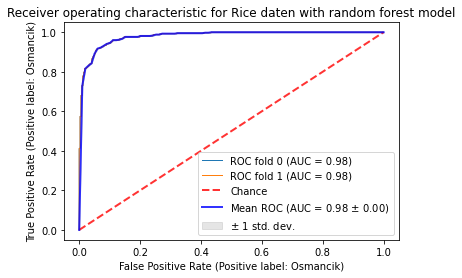

In [38]:
from sklearn import metrics
from itertools import cycle
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits = 2)
classifier = RandomForestClassifier(max_depth = 10, n_estimators = 200, random_state = 0)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X_train, y_train)
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        name = "ROC fold {}".format(i),
        lw = 1,
        ax = ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle = "--", lw = 2, color = "r", label = "Chance", alpha = 0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic for Rice daten with random forest model",
)
ax.legend(loc = "lower right")
plt.show()

## 4. Plotten

### A curve with the Search Time depending on the Number of CPU Cores

#### LogisticRegression Model

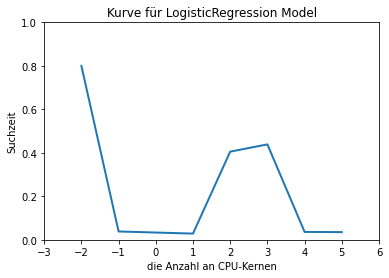

In [39]:
clf1 = GridSearchCV(estimator = LogisticRegression(), param_grid = {'n_jobs': [-2, -1, 1, 2, 3, 4, 5]}, cv = 6).fit(X_train, y_train)
results1 = pd.DataFrame(clf1.cv_results_)
fig, ax = plt.subplots()
ax.plot(results1.param_n_jobs, results1.mean_fit_time, linewidth = 2.0)
plt.title('Kurve für LogisticRegression Model')
plt.xlabel('die Anzahl an CPU-Kernen')
plt.ylabel('Suchzeit')
ax.set(xlim = (-3, 6), ylim = (0, 1))
plt.show()

#### GaussianNB

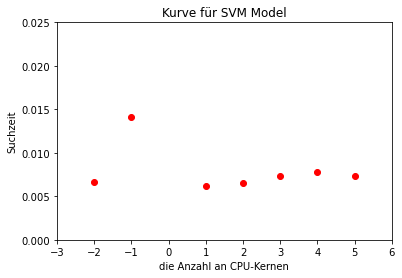

In [40]:
# GaussianNB kann sehr schnell laufen

fig, ax = plt.subplots()
plt.title('Kurve für SVM Model')
plt.xlabel('die Anzahl an CPU-Kernen')
plt.ylabel('Suchzeit')
ax.set(xlim = (-3, 6), ylim = (0, 0.025))

i = -2
for i in range(-2, 6):
    if i == 0: 
        continue
    clf2 = GridSearchCV(estimator = GaussianNB(), param_grid = {}, n_jobs = i).fit(X_train, y_train)
    results2 = pd.DataFrame(clf2.cv_results_).mean_fit_time
    ax.plot(i, results2, 'ro')
    i = i + 1

#### Comparison between RandomForest Classifier and SVM Classifier

In [41]:
results3 = pd.DataFrame()
results4 = pd.DataFrame()

i = -2
for i in range(-2, 6):
    if i == 0: 
        continue
    clf3 = GridSearchCV(estimator = RandomForestClassifier(), param_grid = {}, n_jobs = i).fit(X_train, y_train)
    results3 = pd.concat([results3, pd.DataFrame(clf3.cv_results_)], axis = 0, ignore_index = True)
    i = i + 1
    
j = -2
for j in range(-2, 6):
    if j == 0: 
        continue
    clf4 = GridSearchCV(estimator = svm.SVC(), param_grid = {}, n_jobs = j).fit(X_train, y_train)
    results4 = pd.concat([results4, pd.DataFrame(clf4.cv_results_)], axis = 0, ignore_index = True)
    j = j + 1

In [42]:
results = pd.DataFrame({
    'n_jobs': [-2, -1, 1, 2, 3, 4, 5],
    'RandomForestClassifier': results3['mean_fit_time'],
    'SVM Classifier': results4['mean_fit_time'],
})

results

,n_jobs,RandomForestClassifier,SVM Classifier
0,-2,0.481677,0.141281
1,-1,0.567955,0.168516
2,1,0.353349,0.097579
3,2,0.401375,0.121139
4,3,0.473073,0.145880
5,4,0.548914,0.173076
6,5,0.590712,0.203514


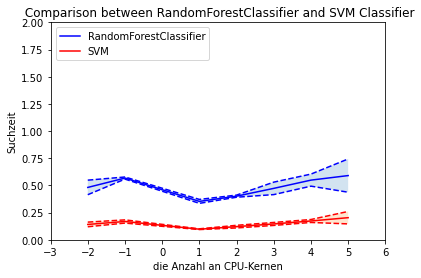

In [44]:
fig, ax = plt.subplots()
plt.title(' Comparison between RandomForestClassifier and SVM Classifier')
plt.xlabel('die Anzahl an CPU-Kernen')
plt.ylabel('Suchzeit')
ax.set(xlim = (-3, 6), ylim=(0, 2))

ax.plot(results['n_jobs'], results['RandomForestClassifier'],  label = 'RandomForestClassifier', c = 'blue')
plt.plot(results['n_jobs'], results['RandomForestClassifier'] + results3['std_fit_time'], "b--")
plt.plot(results['n_jobs'], results['RandomForestClassifier'] - results3['std_fit_time'], "b--")

plt.fill_between(results['n_jobs'], 
                 results['RandomForestClassifier'] + results3['std_fit_time'], 
                 results['RandomForestClassifier'] - results3['std_fit_time'], alpha = 0.2)

ax.plot(results['n_jobs'], results['SVM Classifier'], label = 'SVM', c = 'red')
plt.plot(results['n_jobs'], results['SVM Classifier'] + results4['std_fit_time'], "r--")
plt.plot(results['n_jobs'], results['SVM Classifier'] - results4['std_fit_time'], "r--")

plt.fill_between(results['n_jobs'], results['SVM Classifier'] + results4['std_fit_time'], 
                 results['SVM Classifier'] - results4['std_fit_time'], alpha = 0.2)

plt.legend(loc="upper left")

Text(0.5, 1.0, 'Boxplot for RandomForestClassifier and SVM Classifier')

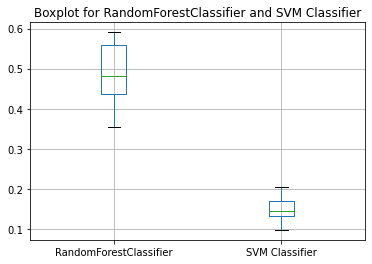

In [45]:
boxplot = results.boxplot(column=['RandomForestClassifier', 'SVM Classifier'])
plt.title('Boxplot for RandomForestClassifier and SVM Classifier')

#### Target Metric depending on Hyperparameters for RandomForest Classifier

In [47]:
df_gridsearch_randForest = pd.DataFrame(gridsearch_randForest.cv_results_)

In [48]:
roc_auc_score(y_train, gridsearch_randForest.predict_proba(X_train)[:, 1])

0.943214724034523

In [49]:
roc_auc_score(y_test, gridsearch_randForest.predict_proba(X_test)[:, 1])

0.9475370919881306

In [50]:
roc = list()
for i in range(2, 6):
    gridsearch_randForest = GridSearchCV(estimator = RandomForestClassifier(), 
                                         param_grid = {'max_depth': [1, 10], 'n_estimators': [3, 200], 
                                                       'random_state': [0, 10]}, cv = i).fit(X_train, y_train)
    roc.append( roc_auc_score(y_train, gridsearch_randForest.predict_proba(X_train)[:, 1]) )
    i = i + 1
pd.DataFrame(gridsearch_randForest.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,param_random_state,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007687,0.000257,0.002360,0.000126,1,3,0,"{'max_depth': 1, 'n_estimators': 3, 'random_st...",0.873770,0.880328,0.896721,0.858785,0.878489,0.877619,0.012186,8
1,0.008551,0.000705,0.002705,0.000279,1,3,10,"{'max_depth': 1, 'n_estimators': 3, 'random_st...",0.911475,0.934426,0.947541,0.926108,0.921182,0.928147,0.012216,1
2,0.283561,0.002504,0.021188,0.000107,1,200,0,"{'max_depth': 1, 'n_estimators': 200, 'random_...",0.901639,0.932787,0.924590,0.906404,0.911330,0.915350,0.011607,4
3,0.289628,0.007532,0.021340,0.000167,1,200,10,"{'max_depth': 1, 'n_estimators': 200, 'random_...",0.898361,0.931148,0.926230,0.904762,0.912972,0.914694,0.012427,5
4,0.013665,0.001141,0.002757,0.000317,10,3,0,"{'max_depth': 10, 'n_estimators': 3, 'random_s...",0.903279,0.919672,0.922951,0.909688,0.909688,0.913056,0.007211,6
5,0.012386,0.000799,0.002467,0.000098,10,3,10,"{'max_depth': 10, 'n_estimators': 3, 'random_s...",0.888525,0.913115,0.916393,0.901478,0.911330,0.906168,0.010127,7
6,0.584525,0.011716,0.030073,0.001618,10,200,0,"{'max_depth': 10, 'n_estimators': 200, 'random...",0.911475,0.926230,0.944262,0.917898,0.917898,0.923553,0.011365,2
7,0.580406,0.007058,0.028978,0.000232,10,200,10,"{'max_depth': 10, 'n_estimators': 200, 'random...",0.911475,0.926230,0.936066,0.919540,0.919540,0.922570,0.008209,3


[(1.0, 6.0), (0.0, 1.5)]

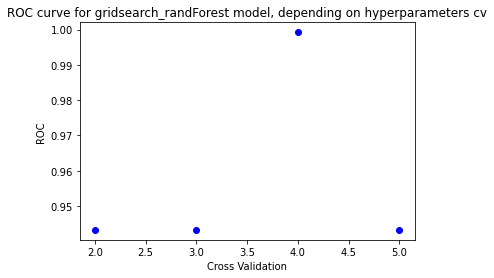

In [52]:
plt.plot([2, 3, 4, 5], roc, 'bo')
plt.title('ROC curve for gridsearch_randForest model, depending on hyperparameters cv')
plt.xlabel('Cross Validation')
plt.ylabel('ROC')
ax.set(xlim = (1, 6), ylim = (0, 1.5))